In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
pd.__version__  # for the record

import mplfinance as mpf
mpf.__version__

import numpy as np
from matplotlib import ticker

import pprint
pp = pprint.PrettyPrinter(indent=2)

'1.5.1'

'0.12.9b5'

In [3]:
!pwd

/home/dino/code/mplfinance/examples/scratch_pad/issues


In [4]:
df = pd.read_csv('issue568.csv',index_col=0,parse_dates=True)
df.head(3)
df.tail(3)

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,17625.70,17625.70,17625.70,17625.70,16181
2022-01-04,17805.25,17805.25,17805.25,17805.25,18604
2022-01-05,17925.25,17925.25,17925.25,17925.25,23737


,Open,High,Low,Close,Volume
Date,,,,,
2022-10-27,17736.95,17736.95,17736.95,17736.95,24166
2022-10-28,17786.80,17786.80,17786.80,17786.80,19100
2022-10-31,18012.20,18012.20,18012.20,18012.20,19846


In [5]:
pnf_kwargs = dict(type='pnf', volume=True, figratio=(1, 1), figscale=5)
pnf_kwargs = dict(type='pnf', volume=False, figratio=(1, 1), figscale=1.5)

close_last_value = int(df['Close'].iloc[-1])
pnf_box_size = round(close_last_value * 0.01)
print("Box_Size is = " + str(pnf_box_size))

pnf_reversal = 3
print("Reversal is = " + str(pnf_reversal))

Box_Size is = 180
Reversal is = 3


hi,lo,xlen,xvals[-1],pad= 18180 15300 18 8 10.0
ylim_top,ylim_bot= 18270.0 15210.0


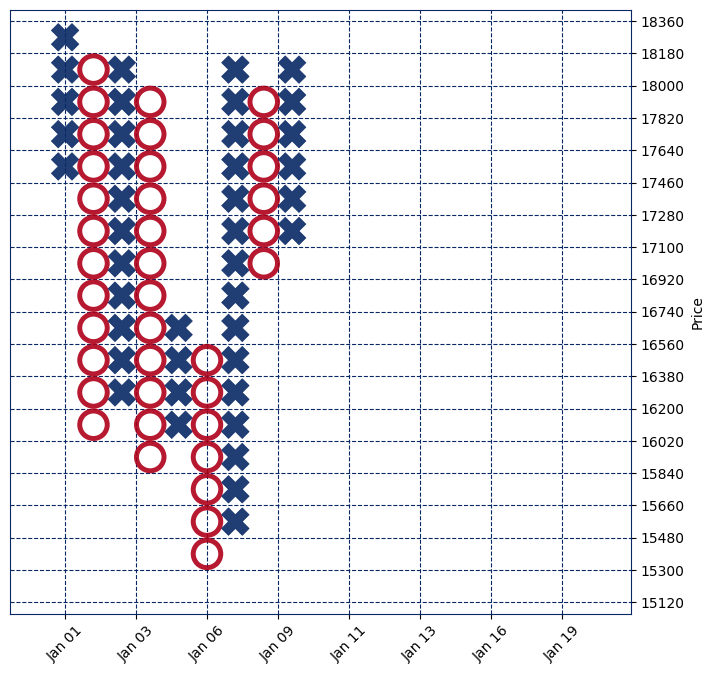

In [6]:
cv = {} # blank dict to hold return_calculated_values values

mpf.plot(df, **pnf_kwargs, style='starsandstripes',
         pnf_params=dict(box_size=pnf_box_size, reversal=pnf_reversal), 
         return_calculated_values=cv)

In [7]:
#pp.pprint(cv)

In [8]:
import yfinance as yf

In [9]:
df = yf.download('SPY',period='1y',interval='1d')#,auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


hi,lo,xlen,xvals[-1],pad= 430 360 16 13 3.0
ylim_top,ylim_bot= 432.5 357.5


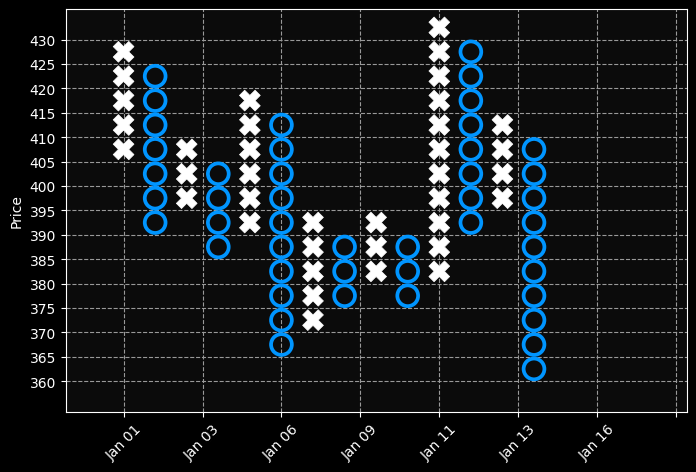

In [10]:
cv = {} # blank dict to hold return_calculated_values values
d1 = '2022-05-01'
d2 = '2022-10-01'
s  = 'nightclouds'
#s  = 'yahoo'
#s  = 'charles'
mpf.plot(df.loc[d1:d2], type='pnf', style=s, figratio=(1.5,1), figscale=1,
         pnf_params=dict(box_size=5, reversal=3), 
         return_calculated_values=cv)

In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-24,466.059998,469.570007,465.190002,469.440002,462.442291,61858800
2021-11-26,462.339996,463.899994,457.769989,458.970001,452.128387,112669600
2021-11-29,464.070007,466.559998,461.730011,464.600006,457.674438,86268800
2021-11-30,462.000000,464.029999,455.299988,455.559998,448.769196,148559600
2021-12-01,461.640015,464.670013,450.290009,450.500000,443.784607,131939200


In [12]:
infile = '../../data/SPY_20110701_20120630_Bollinger.csv'
testdf = pd.read_csv(infile,index_col=0,parse_dates=True)

In [13]:
testdf

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618
2011-07-06,133.490005,134.139999,133.110001,133.970001,117.205429,143331600,134.040915,124.627085,0.992467
2011-07-07,135.160004,135.699997,134.880005,135.360001,118.421478,170464200,135.077014,124.284986,1.026222
2011-07-08,133.830002,135.360001,133.389999,134.399994,117.581619,194100500,135.721110,124.140890,0.885916
...,...,...,...,...,...,...,...,...,...
2012-06-25,132.050003,132.100006,130.850006,131.320007,117.327911,146375700,136.498567,128.120436,0.381896
2012-06-26,131.699997,132.380005,130.929993,131.979996,117.917580,141634000,136.362697,128.084306,0.470585
2012-06-27,132.419998,133.429993,131.970001,133.169998,118.980804,108088000,136.447962,128.140042,0.605441


hi,lo,xlen,xvals[-1],pad= 140.85579838645407 108.35061414342626 17 14 3.0
ylim_top,ylim_bot= 141.93930452788834 107.267108001992


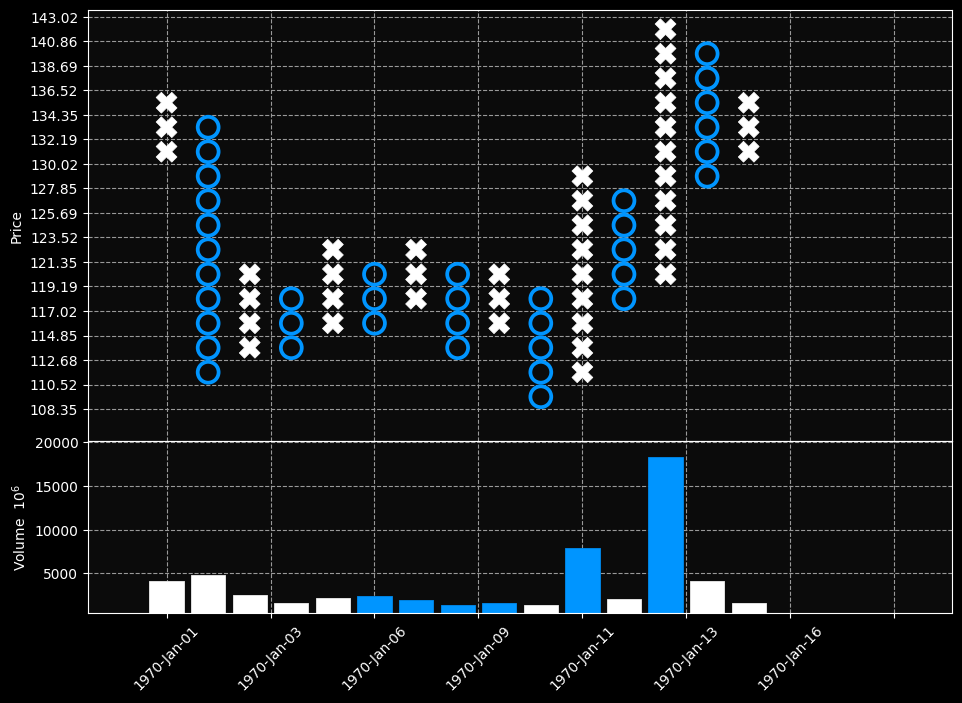

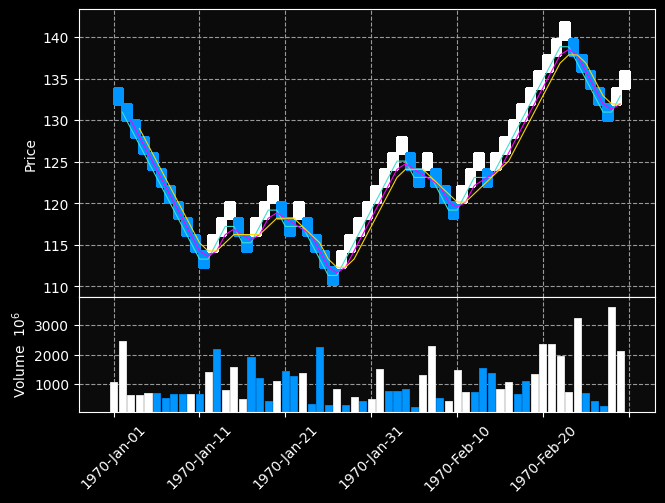

In [14]:
pcv={}
#mpf.plot(testdf,type='pnf',style='nightclouds',volume=True,figscale=1.5,mav=(2,3,4),return_calculated_values=pcv)#,volume=True)
mpf.plot(testdf,type='pnf',style='nightclouds',volume=True,figscale=1.5,return_calculated_values=pcv)#,volume=True)
rcv={}
mpf.plot(testdf,type='renko',style='nightclouds',mav=(2,3,4),volume=True,return_calculated_values=rcv)

In [15]:
#rcv
pcv.keys()
pcv

dict_keys(['pnf_dates', 'pnf_values', 'pnf_size', 'pnf_volumes', 'minx', 'maxx', 'miny', 'maxy'])

{'pnf_dates': [datetime.datetime(2011, 7, 1, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2011, 8, 1, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2011, 8, 11, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2011, 8, 19, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2011, 8, 25, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2011, 9, 6, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2011, 9, 15, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2011, 9, 22, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2011, 9, 27, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2011, 10, 3, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2011, 10, 6, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2011, 11, 17, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2011, 11, 30, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2012, 5, 17, 0, 0, tzinfo=datetime.timezone.utc),
  dateti

hi,lo,xlen,xvals[-1],pad= 140.0 107.5 15 10 5.0
ylim_top,ylim_bot= 141.25 106.25


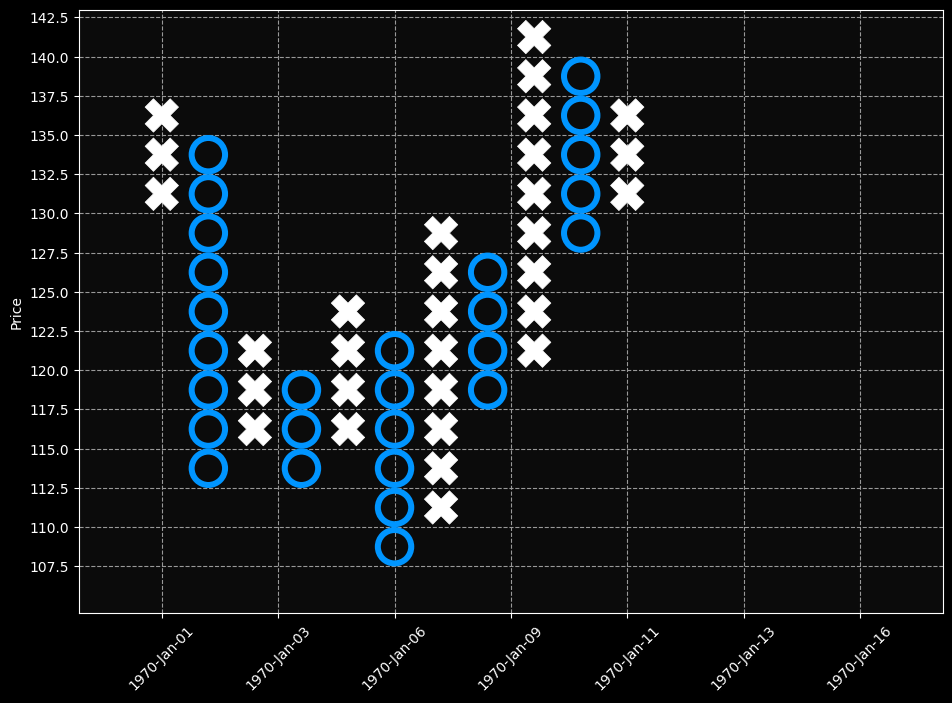

hi,lo,xlen,xvals[-1],pad= 140.0 110.0 14 7 7.0
ylim_top,ylim_bot= 141.25 108.75


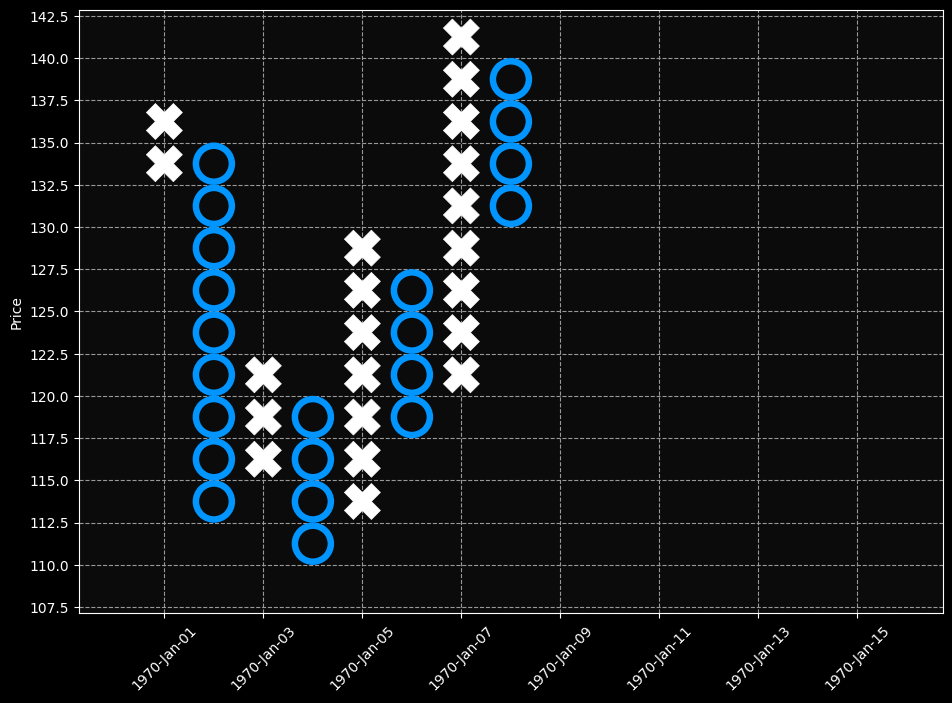

hi,lo,xlen,xvals[-1],pad= 140.0 110.0 14 5 9.0
ylim_top,ylim_bot= 141.25 108.75


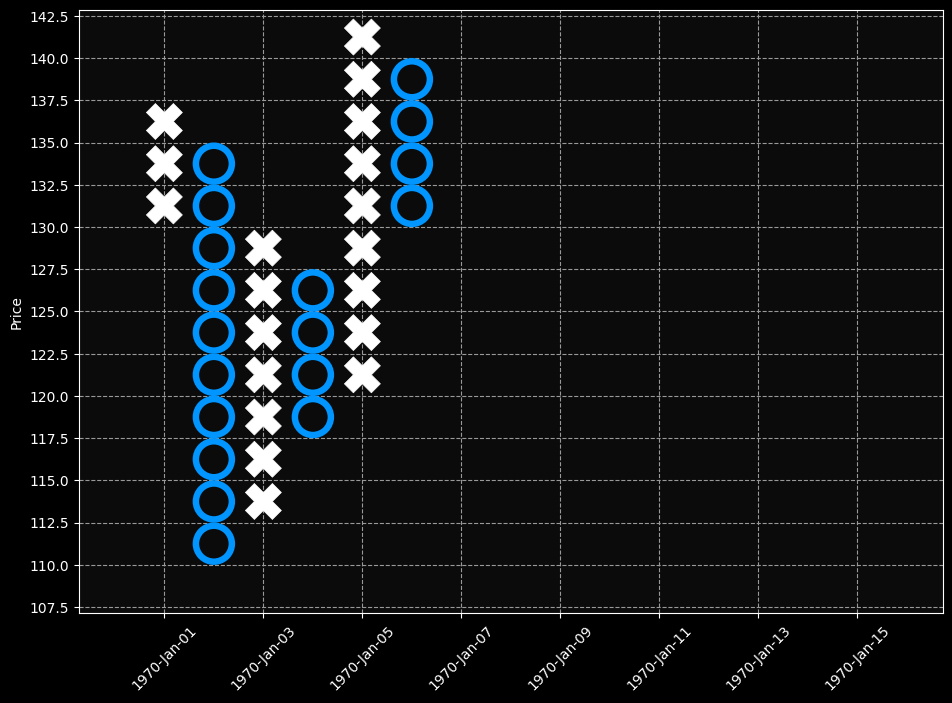

In [16]:
mpf.plot(testdf,type='pnf',style='nightclouds',volume=False,figscale=1.5,
         pnf_params=dict(box_size=2.5,price_method='hilo'))
mpf.plot(testdf,type='pnf',style='nightclouds',volume=False,figscale=1.5,
         pnf_params=dict(box_size=2.5,price_method='close'))
mpf.plot(testdf,type='pnf',style='nightclouds',volume=False,figscale=1.5,
         pnf_params=dict(box_size=2.5,price_method='open'))
#mpf.plot(testdf,type='pnf',style='nightclouds',volume=False,figscale=1.5,
#         pnf_params=dict(box_size=2.5,price_method='high'))